<a href="https://colab.research.google.com/github/JamesLeeeeeee/torchbase/blob/master/torchbase_20220202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

In [ ]:
z= torch.FloatTensor([1,2,3])

In [ ]:
hypothesis= F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

In [ ]:
 z= torch.rand(3,5, requires_grad=True)

In [ ]:
hypothesis= F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [ ]:
hypothesis.sum()

tensor(3.0000, grad_fn=<SumBackward0>)

In [ ]:
y= torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
y_one_hot= torch.zeros_like(hypothesis)
y_one_hot.scatter_(1,y.unsqueeze(1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


In [ ]:
cost=(y_one_hot* -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


In [ ]:
F.log_softmax(z,dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
F.nll_loss(F.log_softmax(z,dim=1),y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [ ]:
F.cross_entropy(z,y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [18]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [12]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [14]:
y_one_hot=torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [15]:
W=torch.zeros((4,3), requires_grad=True)
b=torch.zeros(1, requires_grad= True)
optimizer= optim.SGD([W,b], lr=0.1)

In [16]:
epochs=1000
for epoch in range(epochs+1):
  hypothesis= F.softmax(x_train.matmul(W)+b, dim=1)
  cost=(y_one_hot* -torch.log(hypothesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost:{:.5f}'.format(epoch, epochs, cost.item()))

Epoch    0/1000 Cost:1.09861
Epoch  100/1000 Cost:0.76105
Epoch  200/1000 Cost:0.68999
Epoch  300/1000 Cost:0.64323
Epoch  400/1000 Cost:0.60412
Epoch  500/1000 Cost:0.56826
Epoch  600/1000 Cost:0.53392
Epoch  700/1000 Cost:0.50029
Epoch  800/1000 Cost:0.46691
Epoch  900/1000 Cost:0.43351
Epoch 1000/1000 Cost:0.39996


In [19]:
W=torch.zeros((4,3), requires_grad=True)
b= torch.zeros(1, requires_grad=True)

optimizer= optim.SGD([W,b],lr=0.1)
epochs=1000
for epoch in range(epochs+1):
  z= x_train.matmul(W)+b
  cost=F.cross_entropy(z, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch %100==0:
    print('Epoch {:4d}/{} Cost: {:.5f}'.format(epoch, epochs, cost.item()))

Epoch    0/1000 Cost: 1.09861
Epoch  100/1000 Cost: 0.76105
Epoch  200/1000 Cost: 0.68999
Epoch  300/1000 Cost: 0.64323
Epoch  400/1000 Cost: 0.60412
Epoch  500/1000 Cost: 0.56826
Epoch  600/1000 Cost: 0.53392
Epoch  700/1000 Cost: 0.50029
Epoch  800/1000 Cost: 0.46691
Epoch  900/1000 Cost: 0.43351
Epoch 1000/1000 Cost: 0.39996


In [20]:
model= nn.Linear(4,3)

In [22]:
optimizer=optim.SGD(model.parameters(), lr= 0.1)

epochs=1000
for epoch in range(epochs+1):
  prediction= model(x_train)
  cost=F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost:{:.5f}'.format(epoch, epochs, cost.item()))

Epoch    0/1000 Cost:1.42169
Epoch  100/1000 Cost:0.71265
Epoch  200/1000 Cost:0.63247
Epoch  300/1000 Cost:0.57523
Epoch  400/1000 Cost:0.52488
Epoch  500/1000 Cost:0.47737
Epoch  600/1000 Cost:0.43114
Epoch  700/1000 Cost:0.38541
Epoch  800/1000 Cost:0.33987
Epoch  900/1000 Cost:0.29485
Epoch 1000/1000 Cost:0.25448


In [24]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear= nn.Linear(4,3)

  def forward(self, x):
    return self.linear(x)

model=SoftmaxClassifierModel()

In [25]:
optimizer= optim.SGD(model.parameters(), lr=0.1)

epochs=1000

for epoch in range(epochs+1):
  prediction= model(x_train)

  cost= F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch: {:4d}/{} Cost:{:.5f}'.format(epoch, epochs, cost.item()))

Epoch:    0/1000 Cost:2.63764
Epoch:  100/1000 Cost:0.64790
Epoch:  200/1000 Cost:0.56464
Epoch:  300/1000 Cost:0.51104
Epoch:  400/1000 Cost:0.46725
Epoch:  500/1000 Cost:0.42828
Epoch:  600/1000 Cost:0.39192
Epoch:  700/1000 Cost:0.35674
Epoch:  800/1000 Cost:0.32158
Epoch:  900/1000 Cost:0.28562
Epoch: 1000/1000 Cost:0.25082


In [26]:
for X,Y in data_loader:
  X=X.view(-1,28*28)

NameError: ignored

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA= torch.cuda.is_available()
device= torch.device('cuda' if USE_CUDA else 'cpu')
print('다음 기기가 선택됨:', device)

다음 기기가 선택됨: cuda


In [4]:
random.seed(777)
torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [5]:
training_epochs=15
batch_size=100

In [6]:
mnist_train= dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform= transforms.ToTensor(),
                         download=True)
mnist_test= dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [8]:
data_loader= DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True,
                        drop_last=True)

In [9]:
linear= nn.Linear(784, 10, bias=True).to(device)

In [10]:
criterion= nn.CrossEntropyLoss().to(device)
optimizer= torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
  avg_cost=0
  total_batch= len(data_loader)
  for X,Y in data_loader:
    X= X.view(-1, 28*28).to(device)

    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis= linear(X)
    cost=criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost+= cost/total_batch

  print('Epoch:','%04d'% (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost= 0.282159895
Epoch: 0002 cost= 0.279686391
Epoch: 0003 cost= 0.277776986
Epoch: 0004 cost= 0.276000232
Epoch: 0005 cost= 0.274535358
Epoch: 0006 cost= 0.272986412
Epoch: 0007 cost= 0.271723300
Epoch: 0008 cost= 0.270695716
Epoch: 0009 cost= 0.269374579
Epoch: 0010 cost= 0.268351287
Epoch: 0011 cost= 0.267324507
Epoch: 0012 cost= 0.266678423
Epoch: 0013 cost= 0.265722811
Epoch: 0014 cost= 0.264979392
Epoch: 0015 cost= 0.263942748
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Acc: 0.8783999681472778
Label:  8
Prediction:  3


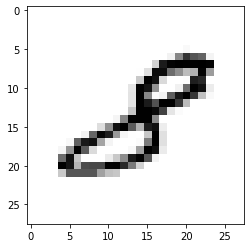

In [13]:
with torch.no_grad():
  X_test= mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test= mnist_test.test_labels.to(device)

  prediction=linear(X_test)
  correct_prediction= torch.argmax(prediction, 1)==Y_test
  accuracy= correct_prediction.float().mean()
  print('Acc:', accuracy.item())

  r= random.randint(0, len(mnist_test)-1)
  X_single_data= mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data=mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction= linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()